ML: Classification
<br>Predicted attribute: survival of passengers from shipwreck

Data Dictionary

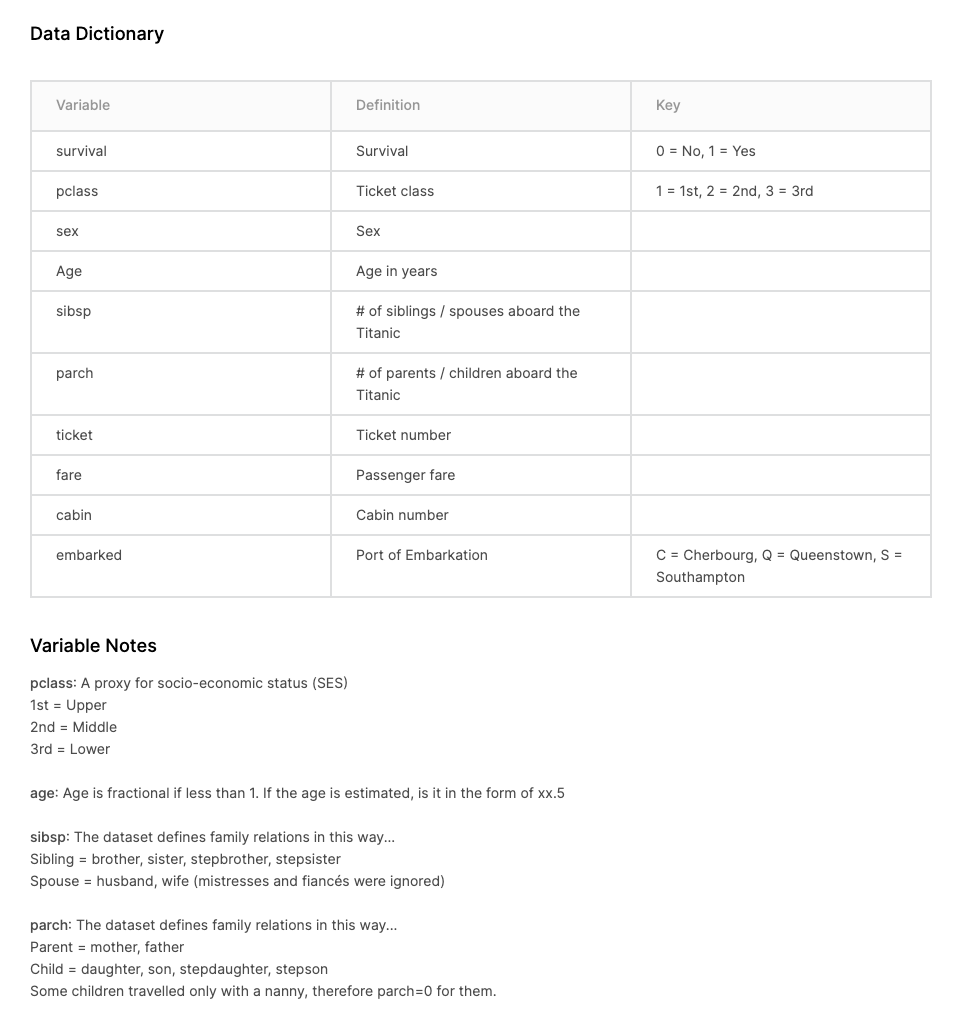

In [1]:
from IPython.display import Image
Image(filename='data/titanic_datanotes.png') 

Data Cleaning and Exploration

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.loc[train['Cabin'].isnull(), 'With_Cabin'] = 0
train.loc[~train['Cabin'].isnull(), 'With_Cabin'] = 1
train.loc[train['Pclass']==3, 'Pclass_inverted'] = 1
train.loc[train['Pclass']==2, 'Pclass_inverted'] = 2
train.loc[train['Pclass']==1, 'Pclass_inverted'] = 3

In [6]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Cabin,Pclass_inverted
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0,2.0


In [7]:
train.loc[train['SibSp']==0, 'With_SibSp'] = 0
train.loc[train['SibSp']!=0, 'With_SibSp'] = 1
train.loc[train['Parch']==0, 'With_Parch'] = 0
train.loc[train['Parch']!=0, 'With_Parch'] = 1
age_null = train[train["Age"].isnull()]
age_notnull = train[~train["Age"].isnull()]
age_null.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Cabin,Pclass_inverted,With_SibSp,With_Parch
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,1.0,0.0,0.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0.0,2.0,0.0,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0.0,1.0,0.0,0.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0.0,1.0,0.0,0.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0.0,1.0,0.0,0.0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0.0,1.0,0.0,0.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1.0,3.0,1.0,0.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0.0,1.0,0.0,0.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0.0,1.0,0.0,0.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0.0,1.0,0.0,0.0


In [8]:
grouped_age_notnull = age_notnull.groupby(["Sex" ,"With_SibSp", "With_Parch", "Pclass"])["Age"].agg(['min', 'max', 'mean'])
grouped_age_notnull

min   max       mean
Sex    With_SibSp With_Parch Pclass                        
female 0.0        0.0        1       16.00  62.0  34.937500
                             2       17.00  57.0  33.383333
                             3        5.00  63.0  23.565789
                  1.0        1       15.00  58.0  31.857143
                             2        6.00  50.0  23.083333
                             3        1.00  45.0  21.388889
       1.0        0.0        1       17.00  63.0  38.083333
                             2       14.00  44.0  29.000000
                             3       14.00  47.0  25.093750
                  1.0        1        2.00  52.0  30.933333
                             2        2.00  54.0  24.736842
                             3        0.75  48.0  17.883333
male   0.0        0.0        1       22.00  80.0  44.601852
                             2       16.00  70.0  33.904762
                             3       11.00  74.0  29.184492
                  1.0        1        4.00  65.0  35.000000
                             2        0.83  36.5  16.582500
                             3        0.42  44.0  23.653333
       1.0        0.0        1       18.00  50.0  37.791667
                             2       21.00  54.0  32.617647
                             3       12.00  41.0  25.826087
                  1.0        1        0.92  70.0  39.892000
                             2        0.67  60.0  19.100000
                             3        1.00  40.0  13.864865

In [9]:
from functools import reduce

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [11]:
data_onehotencoded_list = [train]
for column in ["Sex", "Embarked"]:
    train_encoded_array = encoder.fit_transform(train[[column]].to_numpy()).toarray()
    train_encoded = pd.DataFrame(train_encoded_array, columns = [column+"_"+x.split("_")[-1] for x in encoder.get_feature_names()])
    data_onehotencoded_list.append(train_encoded)
train_onehotencoded_ = reduce(lambda left, right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), data_onehotencoded_list)

In [12]:
train_onehotencoded_.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
With_Cabin         float64
Pclass_inverted    float64
With_SibSp         float64
With_Parch         float64
Sex_female         float64
Sex_male           float64
Embarked_C         float64
Embarked_Q         float64
Embarked_S         float64
Embarked_nan       float64
dtype: object

In [13]:
train_onehotencoded = train_onehotencoded_[[
    "Survived", "Age", "SibSp", "Parch", "Fare",
    "With_Cabin", 
    "Pclass_inverted",
#     "Pclass_1", "Pclass_2", "Pclass_3",
    "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Embarked_nan",
    "With_SibSp", "With_Parch",
]]

In [14]:
train_onehotencoded.head(20)

,Survived,Age,SibSp,Parch,Fare,With_Cabin,Pclass_inverted,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,With_SibSp,With_Parch
0,0,22.0,1,0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,38.0,1,0,71.2833,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,35.0,1,0,53.1000,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,35.0,0,0,8.0500,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,NaN,0,0,8.4583,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0,54.0,0,0,51.8625,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0,2.0,3,1,21.0750,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
8,1,27.0,0,2,11.1333,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,1,14.0,1,0,30.0708,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
train_onehotencoded["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [16]:
train_onehotencoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Age              714 non-null    float64
 2   SibSp            891 non-null    int64  
 3   Parch            891 non-null    int64  
 4   Fare             891 non-null    float64
 5   With_Cabin       891 non-null    float64
 6   Pclass_inverted  891 non-null    float64
 7   Sex_female       891 non-null    float64
 8   Sex_male         891 non-null    float64
 9   Embarked_C       891 non-null    float64
 10  Embarked_Q       891 non-null    float64
 11  Embarked_S       891 non-null    float64
 12  Embarked_nan     891 non-null    float64
 13  With_SibSp       891 non-null    float64
 14  With_Parch       891 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 143.7 KB


In [17]:
train_onehotencoded.describe()

,Survived,Age,SibSp,Parch,Fare,With_Cabin,Pclass_inverted,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,With_SibSp,With_Parch
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.228956,1.691358,0.352413,0.647587,0.188552,0.086420,0.722783,0.002245,0.317621,0.239057
std,0.486592,14.526497,1.102743,0.806057,49.693429,0.420397,0.836071,0.477990,0.477990,0.391372,0.281141,0.447876,0.047351,0.465813,0.426747
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
train_onehotencoded_nonull = train_onehotencoded[~train_onehotencoded["Age"].isnull()]

In [62]:
y_train = train_onehotencoded_nonull["Survived"].to_numpy()
X_train = train_onehotencoded_nonull[[
#     "Age", "SibSp", "Parch", 
    "Fare",
    "With_Cabin", 
#     "Pclass_1", "Pclass_2", "Pclass_3",
    "Pclass_inverted",
    "Sex_female", "Sex_male", 
#     "Embarked_C", 
#     "Embarked_Q", "Embarked_S", "Embarked_nan",
#     "With_SibSp", "With_Parch",
]].to_numpy()

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(
    n_estimators=70, oob_score=True, n_jobs=-1,
    random_state=101, max_features=None, min_samples_leaf=30)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=200)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features=None, min_samples_leaf=15
                              )
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=0.025, random_state=101)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
from numpy import mean

In [66]:
model_dict = {
    "rfm": rfm,
    "lr": lr,
    "nb": nb,
    "sgd": sgd,
    "knn": knn,
    "dtree": dtree,
    "svm": svm,
    "mlp": mlp
}
for k,v in model_dict.items():
    m1 = cross_val_score(v, X_train, y_train, cv=5, scoring="accuracy")
    print(k)
    print(mean(m1), min(m1), max(m1))

rfm
0.7731507928691027 0.7132867132867133 0.8111888111888111
lr
0.7591549295774648 0.7342657342657343 0.795774647887324
nb
0.7577464788732394 0.7132867132867133 0.7887323943661971
sgd
0.702954791687186 0.6126760563380281 0.7342657342657343
knn
0.7339407071801437 0.6363636363636364 0.7692307692307693
dtree
0.7647296365606225 0.7202797202797203 0.7816901408450704
svm
0.7801339505564858 0.7272727272727273 0.8181818181818182
mlp
0.7535506746774352 0.7132867132867133 0.7887323943661971


In [22]:
feature_names = [
    "Age", "SibSp", "Parch", 
    "Fare",
    "With_Cabin", 
    "Pclass_inverted",
    "Sex_female", "Sex_male", 
    "Embarked_C", "Embarked_Q", "Embarked_S", "Embarked_nan",
    "With_SibSp", "With_Parch"
]

from sklearn.feature_selection import f_classif
f_value = f_classif(X_train, y_train)
for feature in zip(feature_names, f_value[0]):
    print(feature)

('Age', 4.271194933816835)
('SibSp', 0.21459928860513625)
('Parch', 6.254607038960784)
('Fare', 55.17948761860116)
('With_Cabin', 83.81480853585845)
('Pclass_inverted', 105.77986826578089)
('Sex_female', 291.2874851899498)
('Sex_male', 291.28748518994996)
('Embarked_C', 27.72768947007629)
('Embarked_Q', 1.7523243633207792)
('Embarked_S', 19.73727609513281)
('Embarked_nan', 2.936196700902583)
('With_SibSp', 6.921438430478518)
('With_Parch', 19.79090020137499)


In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=6)
iris_trim = bestfeatures.fit_transform(X_train, y_train)
print(bestfeatures.scores_)
print(bestfeatures.pvalues_)
print(iris_trim.shape)

[4.27119493e+00 2.14599289e-01 6.25460704e+00 5.51794876e+01
 8.38148085e+01 1.05779868e+02 2.91287485e+02 2.91287485e+02
 2.77276895e+01 1.75232436e+00 1.97372761e+01 2.93619670e+00
 6.92143843e+00 1.97909002e+01]
[3.91246540e-02 6.43327731e-01 1.26106500e-02 3.15599457e-13
 5.66331860e-19 3.16210354e-23 5.22470993e-55 5.22470993e-55
 1.85139258e-07 1.86009645e-01 1.02996475e-05 8.70497345e-02
 8.70105554e-03 1.00223050e-05]
(714, 6)


In [34]:
import numpy

filter = bestfeatures.get_support()
feature_names_ = numpy.array(feature_names)
 
print("All features:")
print(feature_names_)
 
print("Selected best 3:")
print(feature_names_[filter])

All features:
['Age' 'SibSp' 'Parch' 'Fare' 'With_Cabin' 'Pclass_inverted' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan'
 'With_SibSp' 'With_Parch']
Selected best 3:
['Fare' 'With_Cabin' 'Pclass_inverted' 'Sex_female' 'Sex_male'
 'Embarked_C']


In [30]:
filter

array([False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False])